In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import table
from scipy.optimize import curve_fit
from fonctions_maison import *

On importe les données

In [2]:
lamda_doublet, counts_doublet = np.loadtxt("Données/doublet_sodium.txt", unpack = True, skiprows = 17)

lamda_or_brute, counts_or_brute = np.loadtxt("Données/echantillon_or.txt", unpack = True, skiprows = 17)
lamda_or_calib, counts_or_calib = np.loadtxt("Données/sans_echantillon_or.txt", unpack = True, skiprows = 17)

lamda_GaSe_brute, counts_GaSe_brute = np.loadtxt("Données/echantillon_GaSe.txt", unpack = True, skiprows = 17)
lamda_GaSe_calib, counts_GaSe_calib = np.loadtxt("Données/sans_echantillon_GaSe.txt", unpack = True, skiprows = 17)

lamda_un_0, counts_un_0 = np.loadtxt("Données/un0.txt", unpack = True, skiprows = 17)

lamda_deux_0, counts_deux_0 = np.loadtxt("Données/deux0.txt", unpack = True, skiprows = 17)

lamda_trois_0, counts_trois_0 = np.loadtxt("Données/trois0.txt", unpack = True, skiprows = 17)

lamda_vitre_0, counts_vitre_0 = np.loadtxt("Données/vitre0.txt", unpack = True, skiprows = 17)


On fit le doublet de sodium pour déterminer la résolution du spectrographe

H = 3165.690117546604, A = 55778.20194856248, x0 = 588.4706966006324, sigma = 0.6845731444903931


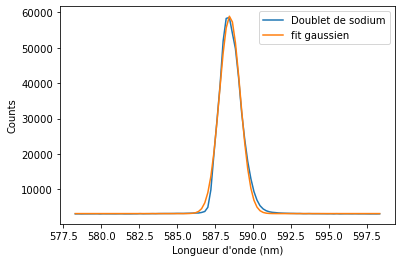

In [3]:
lamda_doublet_gauss, counts_doublet_gauss = lamda_doublet[1100:1200], counts_doublet[1100:1200] #On isole la gaussienne

#Faison un fit gaussien sur la courbe
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

p0 = [2000, 6e4, 587, 3] #Initial guess
p_opt, p_cov = curve_fit(gauss, lamda_doublet_gauss, counts_doublet_gauss, p0)
print("H = {}, A = {}, x0 = {}, sigma = {}".format(p_opt[0], p_opt[1], p_opt[2], p_opt[3]))

H, A, x0, sigma = p_opt[0], p_opt[1], p_opt[2], p_opt[3]

y_fit = gauss(lamda_doublet_gauss,H, A, x0, sigma)

plt.plot(lamda_doublet_gauss, counts_doublet_gauss, label = "Doublet de sodium")
plt.plot(lamda_doublet_gauss, y_fit, label = "fit gaussien")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Counts")
plt.legend()
plt.savefig("Graphiques/fit_gaussien.pdf")
plt.show()

Détermination de la résolution pour l'incertitude

In [4]:
fwhm = 2.35*sigma #Largeur à mi-hauteur de la gaussienne

res = x0/fwhm
print("Résolution du spectromètre: {}".format(res)) #Résolution du spectromètre

def erreur_lambda(lamda): 
    
    inc = lamda/res

    return inc



Résolution du spectromètre: 365.79445804824735


gap d'énergie/phonon

Comparaison entre spectres GaSe brute et spectre de calibration


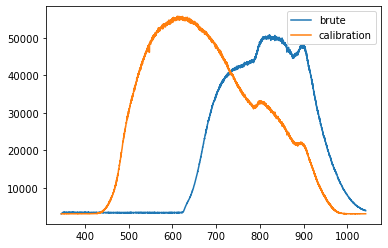

Pourquoi les spectres sont décalés?


In [5]:
with open("Données/echantillon_GaSe.txt") as GaSe_brute:
    int_time_brute = float(list(GaSe_brute)[8].split(":")[1].split("(")[0])
    
with open("Données/sans_echantillon_GaSe.txt") as GaSe_calib:
    int_time_calib = float(list(GaSe_calib)[8].split(":")[1].split("(")[0])
    
# Normalisons le spectre du GaSe   
counts_GaSe_norm = (counts_GaSe_brute/int_time_brute)/(counts_GaSe_calib/int_time_calib)

print("Comparaison entre spectres GaSe brute et spectre de calibration")
plt.plot(lamda_GaSe_brute, counts_GaSe_brute, label = "brute")
plt.plot(lamda_GaSe_brute, counts_GaSe_calib, label = "calibration")
plt.legend()
plt.show()

print("Pourquoi les spectres sont décalés?")

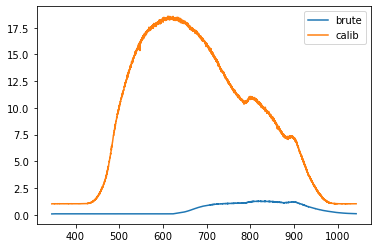

Ils ne sont pas décalés, mais tu avais plutôt oublié de divisé par le temps d'intégration.


In [6]:
plt.plot(lamda_GaSe_brute,counts_GaSe_brute/int_time_brute, label = "brute")
plt.plot(lamda_GaSe_calib,counts_GaSe_calib/int_time_calib, label = "calib")
plt.legend()
plt.show()

print("Ils ne sont pas décalés, mais tu avais plutôt oublié de divisé par le temps d'intégration.")

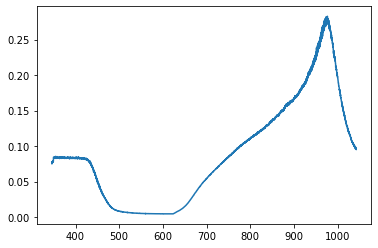

Voici le spectre d'absorption


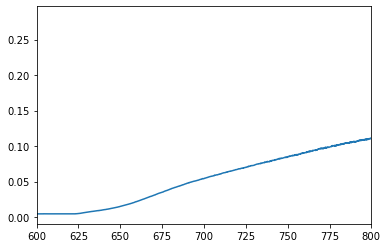

Voici la zone d'importance pour trouver l'énergie de gap et de phonon


In [7]:
plt.plot(lamda_GaSe_calib,counts_GaSe_norm, label = "normalisé")
plt.show()

print("Voici le spectre d'absorption")

plt.plot(lamda_GaSe_calib,counts_GaSe_norm, label = "normalisé")
plt.xlim([600,800])
plt.show()

print("Voici la zone d'importance pour trouver l'énergie de gap et de phonon")

Fréquence de plasma de l'or

Comparaison entre spectres d'or brute et spectre de calibration


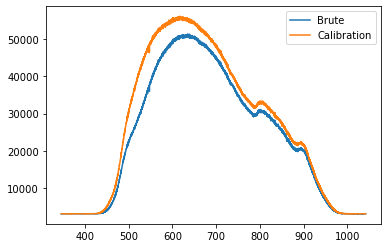

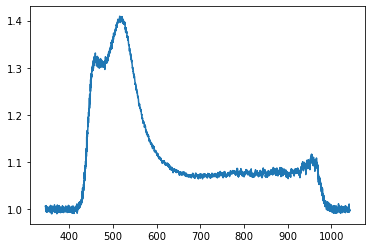

Est-ce que le pic dans le graphique correspond à la fréquence de plasma? 


In [8]:
print("Comparaison entre spectres d'or brute et spectre de calibration")

plt.plot(lamda_or_brute, counts_or_brute, label = "Brute")
plt.plot(lamda_or_calib, counts_or_calib, label = "Calibration")
plt.legend()
plt.show()

plt.plot(lamda_or_brute, counts_or_calib/counts_or_brute)
plt.show()

print("Est-ce que le pic dans le graphique correspond à la fréquence de plasma? ")

Fit gaussien du pic d'absorption de l'or

H = 1.0564512150720493 +/- 0.0007502592124811847, A = 0.34398506826772274 +/- 0.0024825705878519797, x0 = 511.03474602735866 +/- 0.3500948438530101, sigma = 43.01217200839062 +/- 0.3742383010911161


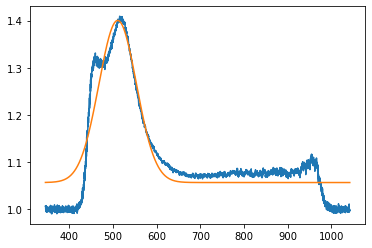

La fréquence plasma de l'or est de 511.03474602735866 +- 0.3500948438530101 nm


In [9]:
counts_or_norm = counts_or_calib/counts_or_brute


p0 = [2000, 6e4, 587, 3] #Initial guess
gauss_or, p_opt, p_cov = fit_gaussien(lamda_or_brute, counts_or_norm, p0 = p0)

print("La fréquence plasma de l'or est de {} +- {} nm".format(p_opt[2], p_cov[2]))

Régression linéaire sur le spectre du GaSe 

a = 0.0005961512486678806 +/- 1.4533115941226671e-06 et b = -0.36311814977978524 +/- 0.0010738273941033908


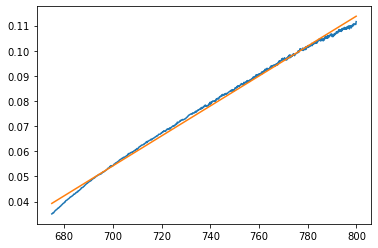

a = 0.0007972468469382458 +/- 4.31818875749396e-06 et b = -0.5037966664243916 +/- 0.002849671918023667


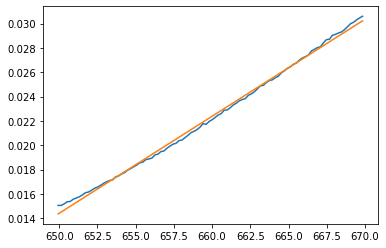

a = -9.652412396997363e-07 +/- 6.86479683864515e-07 et b = 0.0052099605933846075 +/- 0.00041872329882304847


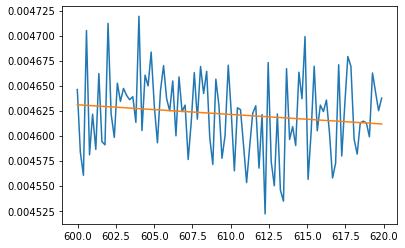

In [10]:
i_gap_debut, i_gap_fin = find_nearest(lamda_GaSe_brute, 675), find_nearest(lamda_GaSe_brute, 800) 
i_phonon_debut, i_phonon_fin = find_nearest(lamda_GaSe_brute, 650), find_nearest(lamda_GaSe_brute, 670) 
i_plateau_debut, i_plateau_fin = find_nearest(lamda_GaSe_brute, 600), find_nearest(lamda_GaSe_brute, 620)
x_gap, y_gap = lamda_GaSe_brute[i_gap_debut:i_gap_fin], counts_GaSe_norm[i_gap_debut:i_gap_fin]
x_phonon, y_phonon = lamda_GaSe_brute[i_phonon_debut:i_phonon_fin], counts_GaSe_norm[i_phonon_debut:i_phonon_fin]
x_plateau, y_plateau = lamda_GaSe_brute[i_plateau_debut:i_plateau_fin], counts_GaSe_norm[i_plateau_debut:i_plateau_fin]

y_fit_gap, popt_gap, perr_gap = reg_lin(x_gap,y_gap)
y_fit_phonon, popt_phonon, perr_phonon = reg_lin(x_phonon,y_phonon)
y_fit_plateau, popt_plateau, perr_plateau = reg_lin(x_plateau, y_plateau)


In [11]:
from scipy.constants import h, c

#Point d'interception entre gap & plateau
lamda_gap = (popt_plateau[1]-popt_gap[1])/(popt_gap[0]-popt_plateau[0])
lamda_phonon = (popt_plateau[1]-popt_phonon[1])/(popt_phonon[0]-popt_plateau[0])

#lamda_gap = -popt_gap[0]/popt_gap[1] #Abscisses à l'origine
#lamda_phonon = -popt_phonon[0]/popt_phonon[1]

E_gap = h*c/(lamda_gap*1e-9)
E_phonon = ( h*c/(lamda_phonon*1e-9) - E_gap )

print("L'énergie de gap est {} eV et l'énergie des phonons est {} eV".format(E_gap/1.602e-19, E_phonon/1.602e-19))

L'énergie de gap est 2.0101960738369926 eV et l'énergie des phonons est -0.06569098333978164 eV


Couche TiO2/Verre

a = 2.8911329168517077 +/- 0.22326674675064095 et b = 2314.8739686162057 +/- 80.3484833283735


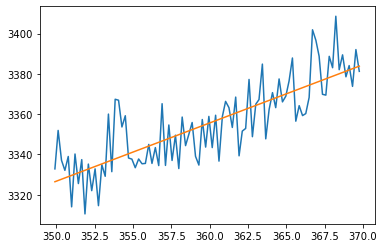

152.20681900617325
(10000, 2, 2)
(2, 2, 10000)
(2, 2, 10000)


'\nM = I_0*T_1*I_1\nE_0 = M*E_1\n\nt = 1/E_0[0,0]\nT = n_B270*np.cos(theta_2)*(t*np.conj(t))/(n_air*np.cos(theta_0))\nprint("T= ",T)'

In [34]:
#Il faut estimer l'incertitude de l'intensité de la lumière capté par le spectromètre.
i_incert_debut, i_incert_fin = find_nearest(lamda_un_0, 350), find_nearest(lamda_un_0, 370)
x_incert, y_incert = lamda_un_0[i_incert_debut:i_incert_fin], counts_un_0[i_incert_debut:i_incert_fin]
y_fit_incert, popt_incert, perr_incert = reg_lin(x_incert, y_incert)

ysig = np.sum( (counts_un_0[i_incert_debut:i_incert_fin]-y_fit_incert)**2 )/(len(y_fit_incert)-1)  #Estimation de l'incertitude
print(ysig)

#Début de la fonction à optimiser
theta_0 = 15

lamda = np.linspace(300,1000,10000) #remplacer par un linspace!!!!!!!!
n1 = 1 #n i
n2 = 2 #n i+1
n_air = 1 + 0.05792105/(238.0185-(lamda*1e-3)**(-2)) + 0.00167917/(57.362-(lamda*1e-3)**(-2)) #lamda en micromètre
n_B270 = np.sqrt(1.676*lamda**2/(lamda**2-99.19**2) + 0.3728*lamda**2/(lamda**2-6.359**2) + 0.2172*lamda**2/(lamda**2-6.436**2)) #lamda en nm
n_TiO2 = np.sqrt(5.913 + 0.2441/((lamda*1e-3)**2-0.0803)) #lamda en micromètre

#snell-descartes
theta_1 = np.arcsin(n_air*np.sin(theta_0)/n_TiO2)
theta_2 = np.arcsin(n_TiO2*np.sin(theta_1)/n_B270)

d=150
delta = 4*np.pi*d*n1*np.cos(theta_1)/lamda #vérifier les unités!!!!!!!!

#On peut prendre les équations 'p' ou 's' sans perte de généralité. Donc voici les équations 'p'.
#Pour le milieu 0, n1=n_air, n2=n_TiO2.
n1=n_air
n2=n_TiO2
theta1 = theta_0 #Angle Entrant
theta2 = theta_1 #Angle Sortant
r = (n2*np.cos(theta1)-n1*np.cos(theta2))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2,3)
t = (2*n1*np.cos(theta1))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2.3)

I_0 = (np.cos(theta2)/np.cos(theta1)) * np.array([[1/t, r/t], [r/t, 1/t]]) #(2.5)

#Pour le milieu 1, n1=n_TiO2, n2=n_B270
n1=n_TiO2
n2=n_B270
theta1 = theta_1 #Entrant
theta2 = theta_2 #Sortant
r = (n2*np.cos(theta1)-n1*np.cos(theta2))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2,3)
t = (2*n1*np.cos(theta1))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2.3)

T_1 = np.ones((10000,2,2)) * np.array([[np.exp(-1.j*delta), 0], [0, np.exp(1.j*delta)]]) #(2.7)
I_1 = (np.cos(theta2)/np.cos(theta1)) * np.array([[1/t, r/t], [r/t, 1/t]]) #(2.5)

E_1 = np.array([1,0])

print(np.shape(T_1))
print(np.shape(I_0))
print(np.shape(I_1))
"""
M = I_0*T_1*I_1
E_0 = M*E_1

t = 1/E_0[0,0]
T = n_B270*np.cos(theta_2)*(t*np.conj(t))/(n_air*np.cos(theta_0))
print("T= ",T)"""

In [ ]:
plt.plot(lamda_deux_0,counts_trois_0/counts_vitre_0)

- Tracer des graphiques théoriques de l'intensité en fonction de la longueur d'onde et comparer visuellement avec les spectres experimentaux pour trouver le d approprié (se fier à la periodicité et à la phase, non à l'amplitude). 

- Fitter seulement le deuxième pic de l'or 

- Loi de snell-descartes pour l'analyse de l'angle d'incidence 

- Angle de référence "0°" : 76° +- 0.5°